- 我们首先导入了所需的库和数据集，包括波士顿房屋数据集。

- 我们使用 load_boston() 加载数据集，并将特征矩阵和目标向量分别赋值给变量 X 和 y。

- 然后，我们使用 train_test_split() 函数将数据集拆分为训练集和测试集，在代码中将测试集大小设置为 20%。

- 接下来，我们使用 StandardScaler() 对特征矩阵进行归一化，将每个特征的平均值缩放到 0，标准差缩放到 1。

- 我们创建了一个岭回归对象 Ridge()，并使用 fit() 方法对训练集进行拟合（训练）。

- 然后，我们使用 predict() 方法对测试集进行预测，得到预测结果。

- 最后，我们使用 mean_squared_error() 函数计算真实值与预测值之间的均方误差（MSE）作为模型性能的评估指标，并将散点图绘制出来以可视化预测结果。

https://www.ml-zhuang.club/3034/223/

In [7]:
# 导入必要的库和数据集
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# 加载波士顿房屋数据集
boston_df = pd.read_csv('./data/1_boston_housing.csv')
# 分离特征和目标变量 
X = boston_df.drop('TARGET', axis=1).values
y = boston_df['TARGET']

In [9]:
# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 归一化特征矩阵
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# 岭回归模型训练和预测
ridge = Ridge(alpha=1.0) # 正则化参数 alpha 默认为 1.0
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

均方误差： 24.31290383049161


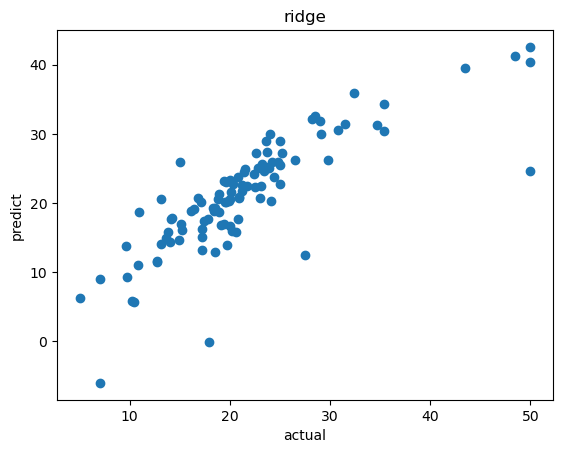

In [12]:
# 评估模型性能
mse = mean_squared_error(y_test, y_pred)
print("均方误差：", mse)

# 绘制预测值与真实值的散点图
plt.scatter(y_test, y_pred)
plt.xlabel("actual")
plt.ylabel("predict")
plt.title("ridge")
plt.show()